<a href="https://colab.research.google.com/github/sydoky/Support-Vector-Regression-SVR-/blob/main/Support_Vector_Regression(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("/content/Position_Salaries.csv")

In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# Applying feature scaling because between level and salary huge difference

In [4]:
y = y.reshape(len(y), 1)

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Training the model on the whole dataset

In [6]:
from sklearn.svm import SVR
vec_reg = SVR(kernel = "rbf")
vec_reg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

 Why do we need to ’sc_Y.inverse_transform’ ?
We need the inverse_transform method to go back to the original scale. Indeed we applied feature scaling
so we get this scale around 0 and if we make a prediction without inversing the scale we will get the
scaled predicted salary. And of course we want the real salary, not the scaled one, so we have to use
’sc_Y.inverse_transform’. Also what is important to understand is that ’transform’ and ’inverse_transform’
are paired methods. 

In [10]:
#this line will help to get the original salaries 

sc_y.inverse_transform(vec_reg.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

# Vizualizing The Support Vector Regression (SVR)

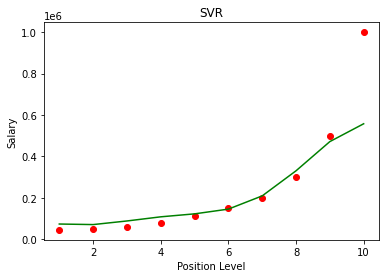

In [12]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(vec_reg.predict(X)), color="green")
plt.title("SVR")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()
